# Regression

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [166]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Data & New Observation

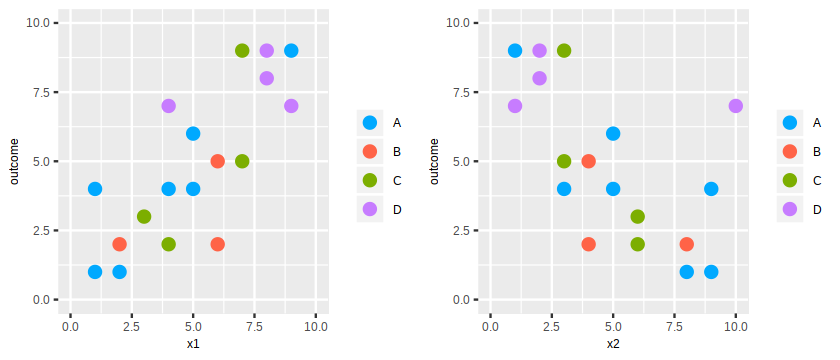

In [167]:
data = data.frame(x1=c(1,2,4,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9),
                  x2=c(9,8,6,3,5,4,3,2,1,9,8,6,1,5,4,3,2,10),
                  x3=c("A","A","C","A","A","B","C","D","A","A","B","C","D","A","B","C","D","D"),
                  outcome=c(1,1,2,4,4,2,5,9,9,4,2,3,7,6,5,9,8,7))

grid.arrange(ggplot(data) + xlim(0,10) + ylim(0,10) + geom_point(aes(x=x1, y=outcome, color=x3)),
             ggplot(data) + xlim(0,10) + ylim(0,10) + geom_point(aes(x=x2, y=outcome, color=x3)),
             nrow=1)

In [168]:
new = data.frame(x1=5.5, x2=7.5, x3=factor("B", c("A","B","C","D")))
fmt(new)

x1,x2,x3
5.5,7.5,B


## Problem 1: Dummy Variables

Express the data and new observation as all numeric variables.  Convert the categorical variables to dummy variables as required.

You may want to use these function(s):
* dummify()

In [169]:
data.dummy = as.data.frame(dummify(data))
data.dummy = data.dummy[,c(1,2,4,5,6,7)]
data.dummy

x1,x2,x3B,x3C,x3D,outcome
1,9,0,0,0,1
2,8,0,0,0,1
4,6,0,1,0,2
4,3,0,0,0,4
5,5,0,0,0,4
6,4,1,0,0,2
7,3,0,1,0,5
8,2,0,0,1,9
9,1,0,0,0,9
1,9,0,0,0,4


In [170]:
new.dummy = as.data.frame(dummify(new))
new.dummy = new.dummy[,c(1,2,4,5,6)]
new.dummy

x1,x2,x3B,x3C,x3D
5.5,7.5,1,0,0


## Problem 2: Simple Linear Regression

Construct a simple linear regression model to predict outcome given x1.<br>
Show the model intercept and coefficient(s).<br>
Show the predicted outcome of the new observation.<br>
Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, overlaid on 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* lm()
* predict()

,model.1.coefficients
(Intercept),0.6907363
x1,0.8304038


x1,x2,x3,outcome.predicted
5.5,7.5,B,5.257957


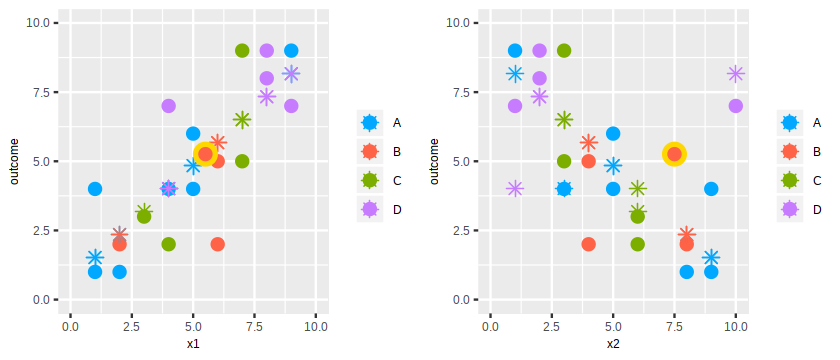

In [171]:
model = lm(outcome ~ x1, data)
predictions.d = predict(model, data)
predictions.n = predict(model, new)
model.1.coefficients = data.frame(model.1.coefficients=model$coefficients)
model.1.coefficients

data$outcome.predicted = predictions.d
new$outcome.predicted = predictions.n[1]
new

grid.arrange(ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x1, y=outcome, color=x3)) + 
             geom_point(shape=8, aes(x=x1, y=outcome.predicted, color=x3), lwd=3) + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, color=PALETTE[2]),
             
             ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x2, y=outcome, color=x3)) + 
             geom_point(shape=8, aes(x=x2, y=outcome.predicted, color=x3), lwd=3) + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, color=PALETTE[2]),
             nrow=1)

## Problem 3: Multiple Linear Regression

Construct a multiple linear regression model to predict outcome given all other variables.<br>
Show the model intercept and coefficient(s).  Show the predicted outcome of the new observation. <br>
Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, as 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* lm()
* predict()

,model.2.coefficients
(Intercept),3.4418106
x1,0.5707866
x2,-0.2625978
x3B,-1.7049598
x3C,-0.5067502
x3D,1.1547282


x1,x2,x3,outcome.predicted
5.5,7.5,B,2.906694


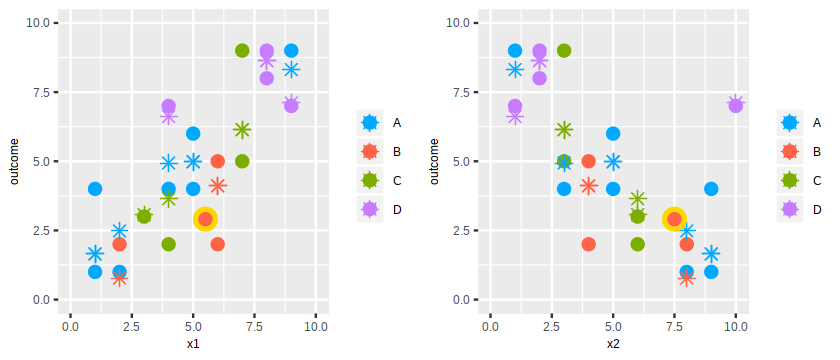

In [172]:
model.2 = lm(outcome ~ x1+x2+x3, data)
predictions.d = predict(model.2, data)
predictions.n = predict(model.2, new)
model.2.coefficients = data.frame(model.2.coefficients=model.2$coefficients)
model.2.coefficients

data$outcome.predicted = predictions.d
new$outcome.predicted = predictions.n[1]
new


grid.arrange(ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x1, y=outcome, color=x3)) + 
             geom_point(shape=8, aes(x=x1, y=outcome.predicted, color=x3), lwd=3) + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, color=PALETTE[2]),
             
             ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x2, y=outcome, color=x3)) + 
             geom_point(shape=8, aes(x=x2, y=outcome.predicted, color=x3), lwd=3) + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, color=PALETTE[2]),
             nrow=1)

## Problem 4: Complex Linear Regression

Construct a linear regression model to predict log outcome given 3rd degree polynomial in x1, 3rd degree polynomial in x2, log x1, log x2, and x3 (converted to dummy variables as required).<br>
Show the model intercept and coefficient(s).<br>
Show the predicted outcome (not predcited log outcome) of the new observation.<br>
Show the actual data, predicted outcomes (not predicted log outcomes) of the data, and predicted outcome (not predicted log outcome) of the new observation, as 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* lm()
* poly()
* log()
* exp()
* predict()

,model.3.coefficients
(Intercept),-1.90513976
"poly(x1, 3, raw = TRUE)1",-1.77130106
"poly(x1, 3, raw = TRUE)2",0.23473948
"poly(x1, 3, raw = TRUE)3",-0.01018167
"poly(x2, 3, raw = TRUE)1",6.25099483
"poly(x2, 3, raw = TRUE)2",-0.82657108
"poly(x2, 3, raw = TRUE)3",0.03951503
log(x1),1.36647924
log(x2),-6.35670531
x3B,-0.26888648


x1,x2,x3,outcome.predicted
5.5,7.5,B,1.072841


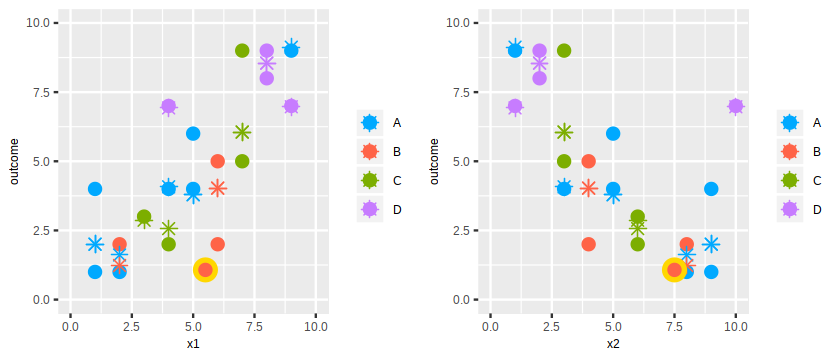

In [173]:
model.3 = lm(log(outcome) ~ poly(x1,3,raw=TRUE) + poly(x2, 3, raw=TRUE) +log(x1)+log(x2)+x3, data)
predictions.d3 = predict(model.3, data)
predictions.n3 = predict(model.3, new)
model.3.coefficients = data.frame(model.3.coefficients=model.3$coefficients)
model.3.coefficients

data$outcome.predicted = predictions.d3
new$outcome.predicted = exp(predictions.n3[1])
new


grid.arrange(ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x1, y=outcome, color=x3)) + 
             geom_point(aes(x=x1, y=exp(outcome.predicted), color=x3), shape=8) + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, color=PALETTE[2]),
             
             ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x2, y=outcome, color=x3)) + 
             geom_point(aes(x=x2, y=exp(outcome.predicted), color=x3), shape=8) + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, color=PALETTE[2]),
             nrow=1)

## Problem 5: Support Vector Regression

Construct a regression model using the support vector machine method to predict outcome given all other variables.  To ensure consistent results, prefix with set.seed(12345).<br>
Use these hyper-parameter settings:<br>
* scale=TRUE
* type="eps-regression"
* kernel="radial"
* gamma=1
* cost=1

Show the predicted outcome of the new observation.<br>
Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, as 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* set.seed()
* svm()
* predict()

<0 x 0 matrix>

x1,x2,x3,outcome.predicted
5.5,7.5,B,4.413205


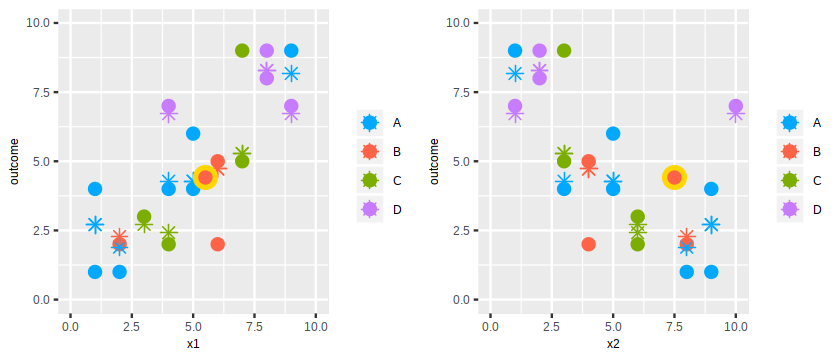

In [174]:
set.seed(12345)
model.4 = model = svm(outcome ~ x1+x2+x3, data, type="eps-regression", 
                      kernel="radial", gamma=1, cost=1, scale=TRUE)
predictions.d4 = predict(model.4, data)
predictions.n4 = predict(model.4, new)
model.4.coefficients = data.frame(model.4.coefficients=model.4$coefficients)
model.4.coefficients

data$outcome.predicted = predictions.d4
new$outcome.predicted = predictions.n4[1]
new


grid.arrange(ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x1, y=outcome, color=x3)) + 
             geom_point(aes(x=x1, y=outcome.predicted, color=x3), shape=8) + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, color=PALETTE[2]),
             
             ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x2, y=outcome, color=x3)) + 
             geom_point(aes(x=x2, y=outcome.predicted, color=x3), shape=8) + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, color=PALETTE[2]),
             nrow=1)

## Problem 6: Regression by Neural Network

Construct a regression model using the neural network method to predict outcome given all other variables. To ensure consistent results, prefix with set.seed(12345).<br>
Use these hyper-parameter settings:
* hidden=3
* algorithm="rprop+"
* rep=1
* act.fct="logistic"

Remember to use the regression form of the function.<br>
Show a diagram of the neural network with connections and weights.<br>
Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, as 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* set.seed()
* neuralnet()
* plot()
* as.vector()
* compute()

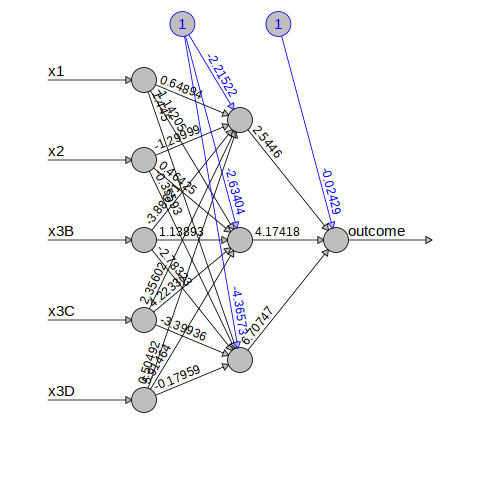

In [175]:
set.seed(12345)
model.5 = neuralnet(outcome ~ x1+x2+x3B+x3C+x3D, data.dummy, hidden=3, algorithm="rprop+", act.fct="logistic", rep=1)

output_size(4,4)
plot(model.5, rep=1, fill="gray", cex=0.7, lwd=0.5, information=FALSE)
output_size(restore)

x1,x2,x3,outcome.predicted
5.5,7.5,B,0.9268674


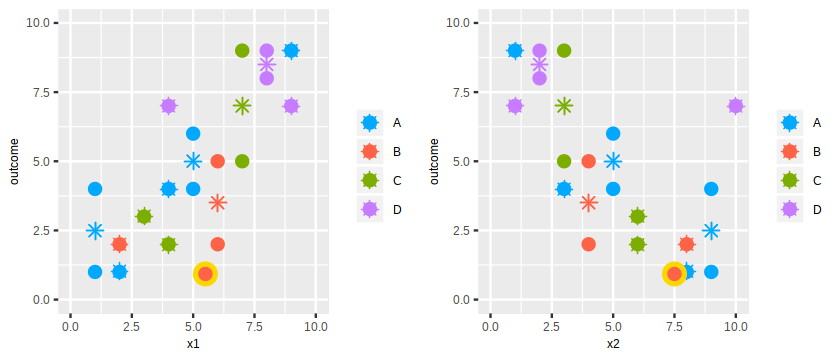

In [176]:
data$outcome.predicted = as.vector(compute(model.5, data.dummy, rep=1)$net.result)
new$outcome.predicted = as.vector(compute(model.5, new.dummy, rep=1)$net.result)
new

grid.arrange(ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x1, y=outcome, color=x3)) + 
             geom_point(aes(x=x1, y=outcome.predicted, color=x3), shape=8) + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x1, y=outcome.predicted), data=new, color=PALETTE[2]),
             
             ggplot(data) + xlim(0,10) + ylim(0,10) + 
             geom_point(aes(x=x2, y=outcome, color=x3)) + 
             geom_point(aes(x=x2, y=outcome.predicted, color=x3), shape=8) + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, size=6, color="gold") + 
             geom_point(aes(x=x2, y=outcome.predicted), data=new, color=PALETTE[2]),
             nrow=1)

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised April 12, 2020
</span>
</p>
</font>